In [1]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


# Install Requirement

In [2]:
!pip install deepface
from deepface import DeepFace
import matplotlib.pyplot as plt
import numpy as np
import os
from PIL import Image
import glob

     |████████████████████████████████| 65 kB 2.7 MB/s 
     |████████████████████████████████| 87 kB 7.7 MB/s 
     |████████████████████████████████| 2.3 MB 82.9 MB/s 
     |████████████████████████████████| 60.5 MB 1.1 MB/s 
     |████████████████████████████████| 462 kB 97.6 MB/s 
  Created wheel for fire: filename=fire-0.4.0-py2.py3-none-any.whl size=115942 sha256=925d677d31fa774fb561d91f700ce42a89e9c6e5c2bd0482abc2f9c13e0fda31
  Stored in directory: /root/.cache/pip/wheels/8a/67/fb/2e8a12fa16661b9d5af1f654bd199366799740a85c64981226
Successfully built fire
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.1.2.30
    Uninstalling opencv-python-4.1.2.30:
      Successfully uninstalled opencv-python-4.1.2.30
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have im

# Load Pas Foto dan Data Uji

In [3]:
data_folder = '/gdrive/MyDrive/Tugas Deepface/'

#Data Pas Foto
data_pas_foto = os.path.join(data_folder, 'Pas Foto')
list_data_pas_foto = []
for filename in glob.glob(data_pas_foto + '/*.jpg') + glob.glob(data_pas_foto + '/*.jpeg') + glob.glob(data_pas_foto + '/*.png') + glob.glob(data_pas_foto + '/*.jfif'):
    im=Image.open(filename)
    list_data_pas_foto.append(im.filename)


#Data Uji
data_uji = os.path.join(data_folder, 'Tes Data')
assert os.path.isdir(data_uji), print(f'Could not find {data_uji}')
list_data_uji = []
for filename in glob.glob(data_uji + '/*.jpg') + glob.glob(data_uji + '/*.jpeg') + glob.glob(data_uji + '/*.png') + glob.glob(data_uji + '/*.jfif'):
    im=Image.open(filename)
    list_data_uji.append(im.filename)

# Tampilan Citra Pas Foto (Jumlah data 25)

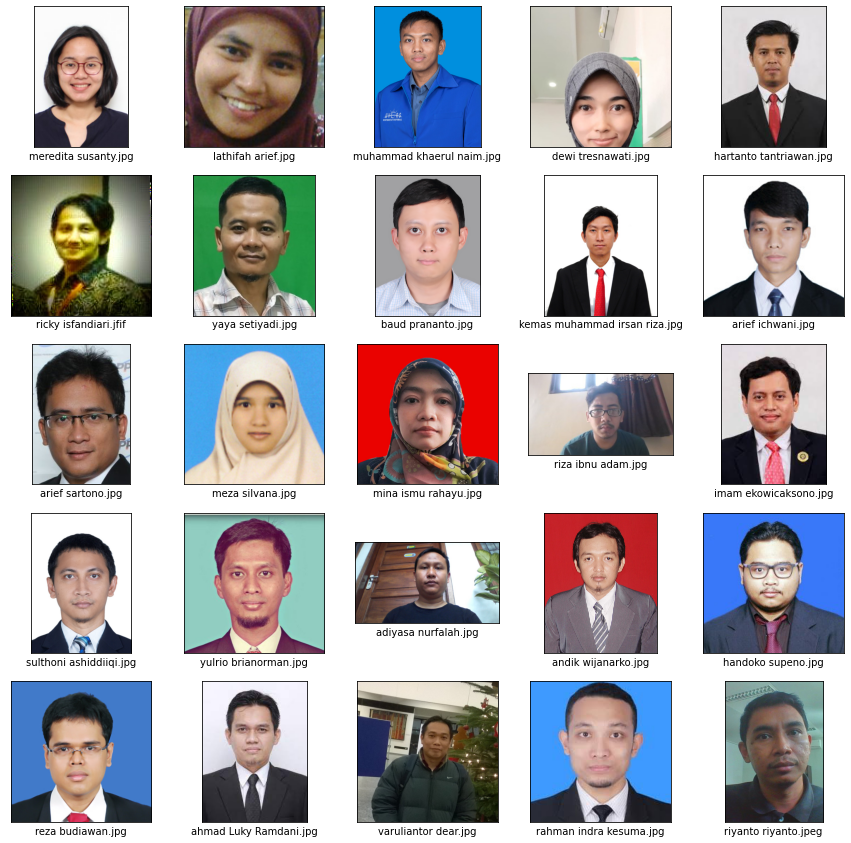

In [4]:
plt.figure(figsize=(15,15))
random_inds = np.random.choice(len(list_data_pas_foto),25, replace=False)
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    image_ind = random_inds[i]
    plt.imshow(np.squeeze(plt.imread(list_data_pas_foto[image_ind])), cmap=plt.cm.binary)
    plt.xlabel(os.path.basename(list_data_pas_foto[image_ind]))

# Tampilan Data Uji (Jumlah Data 49)

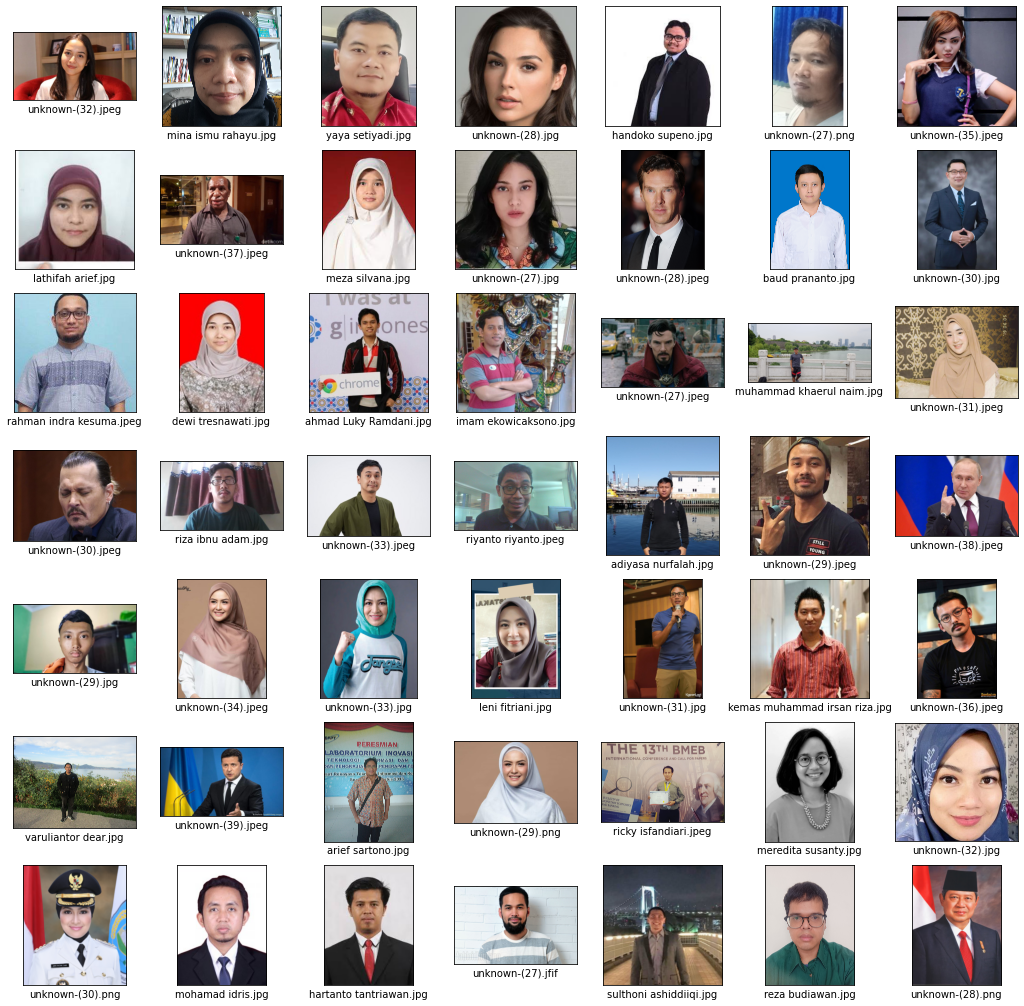

In [5]:
plt.figure(figsize=(18,18))
random_inds = np.random.choice(len(list_data_uji),49,replace=False)
for i in range(49):
    plt.subplot(7,7,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    image_ind = random_inds[i]
    plt.imshow(np.squeeze(plt.imread(list_data_uji[image_ind])), cmap=plt.cm.binary)
    plt.xlabel(os.path.basename(list_data_uji[image_ind]))
    # plt.tight_layout()

# Deteksi dan Pengenalan Wajah

In [22]:
# load data uji & dan mencari gambar yang sama pada data  pas Foto 
imgs = []
img_paths = []
results = []
valid_images = [".jpg",".jpeg",".png",".jfif"]

# Detector, Model, dan Metriks yang digunakan
detectors = ['opencv', 'ssd', 'dlib', 'mtcnn', 'retinaface', 'mediapipe']
metrics = ["cosine", "euclidean", "euclidean_l2"]
models = ["VGG-Face", "Facenet", "Facenet512", "OpenFace", "DeepFace", "DeepID", "ArcFace", "Dlib"]
detector =4
metrik = 0
model = 2

for images in os.listdir(data_uji):
  ext = os.path.splitext(images.lower())[1]
  if ext.lower() not in valid_images:
    continue
  print('image = '+images)
  # save img path to array
  img_path = data_uji+"/"+images
  img_paths.append(img_path)

  # save image to array
  img = DeepFace.detectFace(img_path = img_path, detector_backend = detectors[detector], enforce_detection = False, align = True)
  imgs.append(img)

  # face verification
  result = DeepFace.find(img_path = img_path, db_path = data_pas_foto, model_name = models[model],detector_backend = detectors[detector], 
                         distance_metric = metrics[metrik],enforce_detection = False, align = True)

  # save result to array
  results.append(result)

# array length
print('image path array length = '+str(len(np.array(img_paths))))
print('image array length = '+str(len(np.array(imgs))))
print('result array length = '+str(len(np.array(results))))
results[0]

image = arief sartono.jpg
retinaface.h5 will be downloaded from the url https://github.com/serengil/deepface_models/releases/download/v1.0/retinaface.h5


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/retinaface.h5
To: /root/.deepface/weights/retinaface.h5
100%|██████████| 119M/119M [00:06<00:00, 18.1MB/s]


There are  23  representations found in  representations_facenet512.pkl
find function lasts  0.46969151496887207  seconds
image = muhammad khaerul naim.jpg
There are  23  representations found in  representations_facenet512.pkl
find function lasts  0.23007845878601074  seconds
image = leni fitriani.jpg
There are  23  representations found in  representations_facenet512.pkl
find function lasts  0.1826634407043457  seconds
image = dewi tresnawati.jpg
There are  23  representations found in  representations_facenet512.pkl
find function lasts  0.18727493286132812  seconds
image = hartanto tantriawan.jpg
There are  23  representations found in  representations_facenet512.pkl
find function lasts  0.17638731002807617  seconds
image = meredita susanty.jpg
There are  23  representations found in  representations_facenet512.pkl
find function lasts  0.18595480918884277  seconds
image = meza silvana.jpg
There are  23  representations found in  representations_facenet512.pkl
find function lasts  0.

,identity,Facenet512_cosine
0,/gdrive/MyDrive/Tugas Deepface/Pas Foto/arief ...,0.211165


In [23]:
# create side by side for image show
side_imgs = []
side_paths = []
for i in range(len(img_paths)):
  side_imgs.append(imgs[i])
  side_paths.append(img_paths[i])
  res_img_path = "null"
  img = "null"
  if len(np.array(results[i]))>0:
    res_img_path = np.array(results[i])[0][0]
    img = DeepFace.detectFace(img_path = res_img_path, 
                              detector_backend = detectors[detector], enforce_detection = False, align = True)
  side_imgs.append(img)
  side_paths.append(res_img_path)

In [ ]:
# show side by side test-ref
plt.figure(figsize=(15,150))
for i in range(len(img_paths)*2):
    plt.subplot(len(img_paths),2,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    if side_imgs[i]=="null":
      plt.imshow(np.zeros((100,100,3), np.uint8))
      plt.xlabel("unknown")
    else:
      plt.imshow(np.array(side_imgs[i]))
      plt.xlabel(side_paths[i])
      plt.tight_layout()

In [ ]:
# setting parameter
THRESHOLD = 0.5

# show distance, label, and result
correctness = 0
for i in range(len(img_paths)):
  test_filename = img_paths[i][len(data_uji)+1:]
  arr_test_filename = test_filename.split('-')

  if len(np.array(results[i]))>0:
    res_img_path = np.array(results[i])[0][0]
    ref_filename = res_img_path[len(data_pas_foto)+1:]
    arr_ref_filename = ref_filename.split('-')
    distance = np.array(results[i])[0][1]
  else:
    ref_filename = '-'
    distance = 1000
    arr_ref_filename = '-'
  
  if distance>THRESHOLD:
    label = 'unknown'
  else:
    label = arr_ref_filename[0]
  
  if label == arr_test_filename[0]:
    status = True
    correctness +=1
  else:
    status = False
  
  print('\n'+str(i+1)+
        '. '+test_filename+
        ', '+ref_filename+
        ', '+str(distance)+
        ', '+label+
        ', '+str(status))


1. arief sartono.jpg, -, 1000, unknown, False

2. muhammad khaerul naim.jpg, muhammad khaerul naim.jpg, 0.7229118034298979, unknown, False

3. leni fitriani.jpg, riza ibnu adam.jpg, 0.7270520791261537, unknown, False

4. dewi tresnawati.jpg, dewi tresnawati.jpg, 0.8662692790776878, unknown, False

5. hartanto tantriawan.jpg, hartanto tantriawan.jpg, 7.569133155171331e-07, hartanto tantriawan.jpg, True

6. meredita susanty.jpg, meredita susanty.jpg, 0.6340512175209567, unknown, False

7. meza silvana.jpg, meza silvana.jpg, 0.42646530235398933, meza silvana.jpg, True

8. lathifah arief.jpg, lathifah arief.jpg, 0.9436359338246282, unknown, False

9. mohamad idris.jpg, dewi tresnawati.jpg, 0.9659713380076514, unknown, False

10. mina ismu rahayu.jpg, mina ismu rahayu.jpg, 0.6621275733392523, unknown, False

11. ahmad Luky Ramdani.jpg, ahmad Luky Ramdani.jpg, 0.5213338533060106, unknown, False

12. handoko supeno.jpg, handoko supeno.jpg, 0.8274178844403027, unknown, False

13. imam ekowica

In [ ]:
# print accuracy
accuracy = correctness/len(img_paths)*100
print('No. of test data = '+str(len(img_paths)))
print('No. of correct recognition = '+str(correctness))
print('Accuracy = '+str(accuracy)+' %')

No. of test data = 49
No. of correct recognition = 28
Accuracy = 57.14285714285714 %
